A statistical procedure that uses linear transformation to convert a set of observations of correlated variables into a set of values of linearly uncorrelated variables called principal components. The original data is projected into a much smaller space to reduce dimensionality and it tries to combine the relationships of the data that can reveal relationships.

As the PCA reduces the dimensionality so there is loss of data. In this case, the dimensionality is reduced from multiple 9 to 2 in this case. The expected variance suggests that the first PCA component consists of 65.45 % of the variance and the second PCA component comprises of 8.6%. This means total of 74.05% of the data is lost during dimensionality reduction.

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
df.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

#Pre-processing to clean up data
df = df.drop(['Sample code'],axis=1)
df = df.replace('?',np.NaN)    
df['Bare Nuclei']= df['Bare Nuclei'].fillna(df['Bare Nuclei'].median())

#print the class values
print('Clase values are: {}'.format(df['Class'].unique()))

#Split the dataframe into X and Y to be able to calculate the PCA on the data excluding the target (Class)
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

#columns of X
X.columns = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses']

#z-score, also termed as standardization
std_scaler = preprocessing.StandardScaler()
std_scaled = std_scaler.fit_transform(X)
X_standardized = pd.DataFrame(std_scaled, columns = X.columns)

Clase values are: [2 4]


Explained variance ratio for each component is [0.65445704 0.0860859 ]


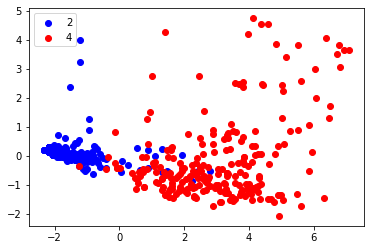

In [6]:
#Compute the explained variance ratio for each component
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_standardized)
pca_df = pd.DataFrame(data=pca_components,columns=['pc1','pc2'])
print('Explained variance ratio for each component is {}'.format(pca.explained_variance_ratio_))

#concatenate the X and Y matrices
df_XY = pd.concat([X_standardized, Y], axis=1)

#Scatterplot of all samples along the two principal components, color-coded according to the "Class" column
#to plot the projected values 
targets = [2,4]
colors = ['b','r']
for target,color in zip(targets,colors):   
    indicestokeep = df_XY['Class'] == target
    plt.scatter(pca_df.loc[indicestokeep,'pc1'],pca_df.loc[indicestokeep,'pc2'],c=color,s=None)
plt.legend(targets)